In [210]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
# read dataset
data = pd.read_csv("uswages.csv")
data.head()

,Unnamed: 0,wage,educ,exper,race,smsa,ne,mw,so,we,pt
0,6085,771.60,18,18,0,1,1,0,0,0,0
1,23701,617.28,15,20,0,1,0,0,0,1,0
2,16208,957.83,16,9,0,1,0,0,1,0,0
3,2720,617.28,12,24,0,1,1,0,0,0,0
4,9723,902.18,14,12,0,1,0,1,0,0,0


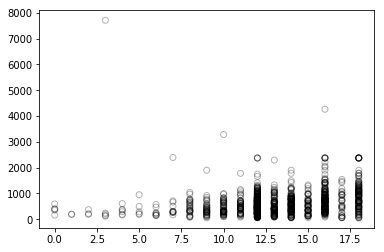

In [4]:
# data exploration
# educ vs wage
data_x = data['educ']
data_y = data['wage']

#dividing data into train and testing set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.33, random_state = 1)


#visualize the relationship between education and wage
plt.scatter(train_x, train_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)

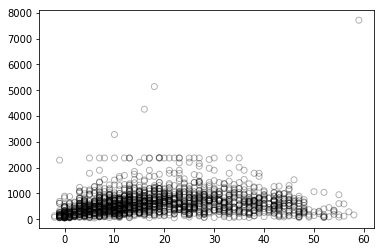

In [28]:
# exper vs wage --> use this
data_x = data[['exper']]
data_y = data[['wage']]

#dividing data into train and testing set
#from sklearn.model_selection import train_test_split
#train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.33, random_state = 1)


#visualize the relationship between education and wage
#plt.scatter(train_x, train_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.scatter(data_x, data_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)

In [6]:
# test model with simple linear regression

#from sklearn.linear_model import LinearRegression
#x = train_x.reshape(-1, 1)
#model = LinearRegression()
#model.fit(x, train_y)
#print(model.coef_) 
#print(model.intercept_)

#using statsmodel
data_x = sm.add_constant(data_x)  #add an intercept (beta_0) to our model
model = sm.OLS(data_y, data_x).fit()
predictions = model.predict(data_x) #make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     69.39
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           1.48e-16
Time:                        23:18:52   Log-Likelihood:                -15065.
No. Observations:                2000   AIC:                         3.013e+04
Df Residuals:                    1998   BIC:                         3.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.1669     17.204     28.607      0.000     458.427     525.907
exper          6.2981      0.756      8.330      0.000       4.815       7.781
==============================================================================
Omnibus:                     1741.557   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112147.928
Skew:                           3.749   Prob(JB):                         0.00
Kurtosis:                      38.910   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

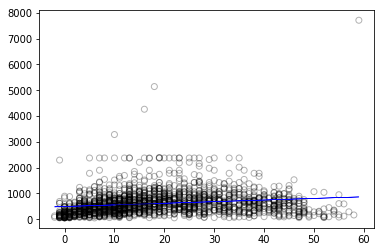

In [7]:
# data visualization
plt.scatter(data_x['exper'], data_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(data_x['exper'], predictions, color = 'blue', linewidth = 0.6)

In [8]:
#refit model using polynomial regression
#"exper" with degree = 2

data_x['exper2'] = np.power(data_x['exper'], 2)

#using statsmodel
model_2 = sm.OLS(data_y, data_x).fit()
predictions = model_2.predict(data_x) #make the predictions by the model

# Print out the statistics
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     109.9
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           5.45e-46
Time:                        23:18:57   Log-Likelihood:                -14995.
No. Observations:                2000   AIC:                         3.000e+04
Df Residuals:                    1997   BIC:                         3.001e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        293.8244     23.383     12.566      0.000     247.967     339.682
exper         34.3964      2.443     14.082      0.000      29.606      39.187
exper2        -0.6160      0.051    -12.055      0.000      -0.716      -0.516
==============================================================================
Omnibus:                     2029.766   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           252680.783
Skew:                           4.591   Prob(JB):                         0.00
Kurtosis:                      57.294   Cond. No.                     1.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

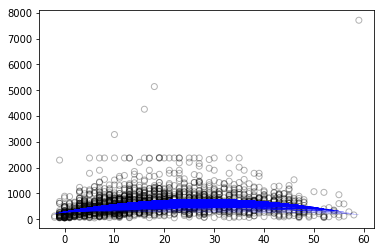

In [9]:
# data visualization
plt.scatter(data_x['exper'], data_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(data_x['exper'], predictions, color = 'blue', linewidth = 0.1)

In [128]:
data_ylim = data.loc[data['wage']<= 4000]
wage = data_ylim[['wage']]
exper_x = data_ylim[['exper']]
exper_x['exper2'] = np.power(exper_x[['exper']], 2)

#using statsmodel
model_3 = sm.OLS(wage, exper_x).fit()
predictions = model_3.predict(exper_x) #make the predictions by the model

# Print out the statistics
model_3.summary()

/Users/mandy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2346.
Date:                Tue, 20 Nov 2018   Prob (F-statistic):               0.00
Time:                        01:00:27   Log-Likelihood:                -14787.
No. Observations:                1997   AIC:                         2.958e+04
Df Residuals:                    1995   BIC:                         2.959e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exper         61.9178      1.202     51.494      0.000      59.560      64.276
exper2        -1.1330      0.033    -33.974      0.000      -1.198      -1.068
==============================================================================
Omnibus:                      619.690   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2571.949
Skew:                           1.450   Prob(JB):                         0.00
Kurtosis:                       7.743   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

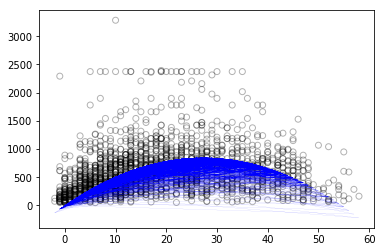

In [11]:
# data visualization
plt.scatter(exper_x['exper'], wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(exper_x['exper'], predictions, color = 'blue', linewidth = 0.05)

In [12]:
# piecewise step function
# divide "exper" into 4 bins
data_cut, bins = pd.cut(exper_x['exper'], 4, retbins = True, right = True)
data_cut.value_counts(sort=False)

(-2.06, 13.0]    897
(13.0, 28.0]     643
(28.0, 43.0]     351
(43.0, 58.0]     106
Name: exper, dtype: int64

In [13]:
#concatenate dataset
data_steps = pd.concat([wage, data_cut, exper_x], axis=1, sort=False)

#create dummy variables for exper
data_steps_dummy = pd.get_dummies(data_cut)
data_steps_dummy.head()

,"(-2.06, 13.0]","(13.0, 28.0]","(28.0, 43.0]","(43.0, 58.0]"
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [14]:
data_steps_dummy.columns = ['lev1', 'lev2', 'lev3', 'lev4']
list(data_steps_dummy)

['lev1', 'lev2', 'lev3', 'lev4']

In [15]:
# fitting generalized linear model
model4 = sm.GLM(data_steps.wage, data_steps_dummy).fit()
# find fitted value
predictions = model4.predict(data_steps_dummy)
# print summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 1997
Model:                            GLM   Df Residuals:                     1993
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                      1.5399e+05
Method:                          IRLS   Log-Likelihood:                -14758.
Date:                Mon, 19 Nov 2018   Deviance:                   3.0690e+08
Time:                        23:19:12   Pearson chi2:                 3.07e+08
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lev1         478.4245     13.102     36.514      0.000     452.744     504.105
lev2         741.9460     15.475     47.944      0.000     711.615     772.277
lev3         693.6623     20.946     33.117      0.000     652.610     734.715
lev4         466.1998     38.115     12.231      0.000     391.496     540.904
==============================================================================
"""

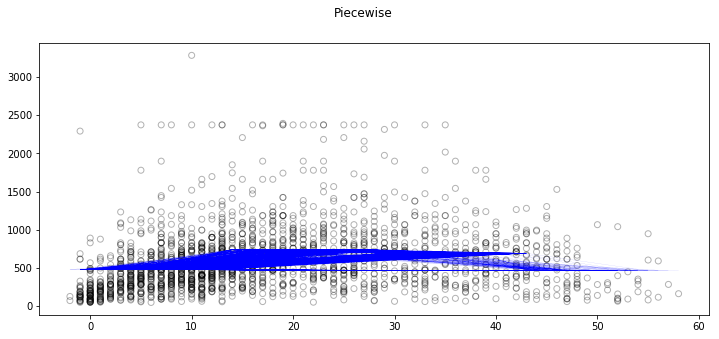

In [16]:
# data visualization
fig, (ax1) = plt.subplots(1,1, figsize=(12, 5))
fig.suptitle('Piecewise')
ax1.scatter(exper_x['exper'], wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
ax1.plot(exper_x['exper'], predictions, color = 'blue', linewidth = 0.05)

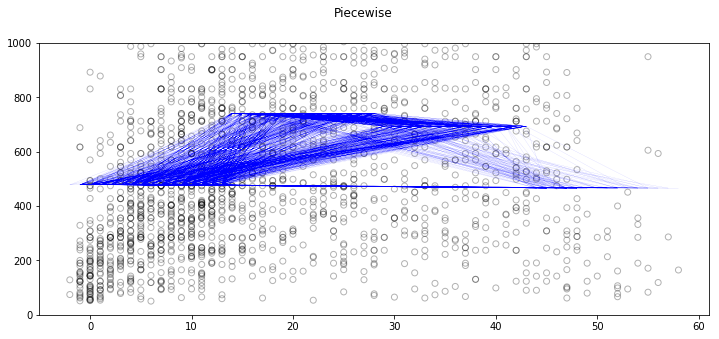

In [17]:
fig, (ax1) = plt.subplots(1,1, figsize=(12, 5))
fig.suptitle('Piecewise')
ax1.set_ylim([0, 1000])
ax1.scatter(exper_x['exper'], wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
ax1.plot(exper_x['exper'], predictions, color = 'blue', linewidth = 0.05)
plt.show()

In [133]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import interpolate

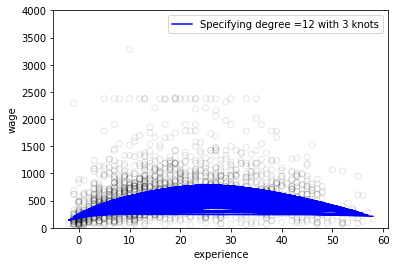

381.1525710548793


In [216]:
## 1 ## 
# cubic spline with 3 knots at 10, 25, 40
cubic_x = dmatrix("bs(train, knots = (10, 25, 40), include_intercept = False)", {"train": exper_x[['exper']]}, return_type = 'dataframe')
model5 = sm.GLM(wage, cubic_x).fit()
model5.summary()

# find fitted value
fit1 = model5.predict(cubic_x)

# plot the spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(exper_x[['exper']], fit1, color='b', label='Specifying degree =12 with 3 knots')
plt.legend()

plt.ylim(0,4000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

# Calculating RMSE value
rms = sqrt(mean_squared_error(wage, fit1))
print(rms)

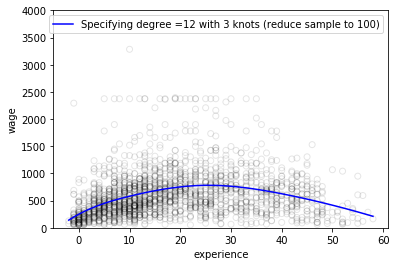

In [217]:
# reduce samples down to 100
x_lim = np.linspace(exper_x[['exper']].min(), exper_x[['exper']].max(), 100)

# find fitted value using x_lim
fit1_reduce = model5.predict(dmatrix("bs(train, knots = (10, 25, 40), include_intercept = False)", {"train": x_lim}, return_type = 'dataframe'))

# plot spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(x_lim, fit1_reduce, color='b', label='Specifying degree =12 with 3 knots (reduce sample to 100)')
plt.legend()
plt.ylim(0,4000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

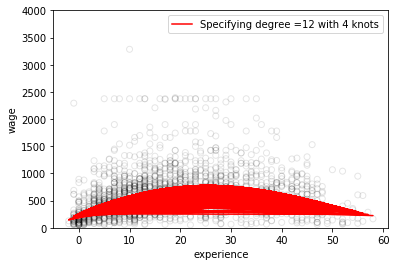

381.18448344957767


In [214]:
## 2 ## 
# cubic spline with 4 knots at 5, 15, 25, 40
cubic_x2 = dmatrix("bs(data, knots = (5, 15, 25, 40), include_intercept = False)", {"data": exper_x[['exper']]}, return_type = 'dataframe')
model6 = sm.GLM(wage, cubic_x2).fit()

# find fitted value
fit2 = model6.predict(cubic_x2)

# plot spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(exper_x[['exper']], fit2, color='r', label='Specifying degree =12 with 4 knots')
plt.legend()

plt.ylim(0,4000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

# Calculating RMSE value
rms = sqrt(mean_squared_error(wage, fit2))
print(rms)

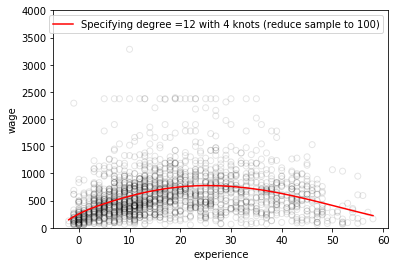

In [198]:
# reduce samples down to 100
#x_lim = np.linspace(exper_x[['exper']].min(), exper_x[['exper']].max(), 100)

# find fitted value using x_lim
fit2_reduce = model6.predict(dmatrix("bs(train, knots = (5, 15, 25, 40), include_intercept = False)", {"train": x_lim}, return_type = 'dataframe'))

# plot spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(x_lim, fit2_reduce, color='r', label='Specifying degree =12 with 4 knots (reduce sample to 100)')
plt.legend()
plt.ylim(0,4000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

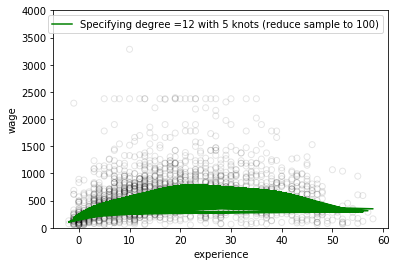

380.8857568244384


In [213]:
## 3 ## 
# cubic spline with 5 knots at 10, 20, 30, 40, 50
cubic_x3 = dmatrix("bs(train, knots = (10, 20, 30, 40, 50), include_intercept = False)", {"train": exper_x[['exper']]}, return_type = 'dataframe')
model7 = sm.GLM(wage, cubic_x3).fit()

# find fitted value
fit3 = model7.predict(cubic_x3)

# plot spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(exper_x[['exper']], fit3, color='g', label='Specifying degree =12 with 5 knots (reduce sample to 100)')
plt.legend()
plt.ylim(0,4000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

# Calculating RMSE value
rms = sqrt(mean_squared_error(wage, fit3))
print(rms)

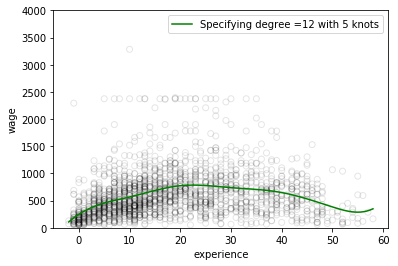

In [206]:
# reduce samples down to 100
x_lim = np.linspace(exper_x[['exper']].min(), exper_x[['exper']].max(), 100)

# find fitted value using x_lim
fit3_reduce = model7.predict(dmatrix("bs(train, knots = (10, 20, 30, 40, 50), include_intercept = False)", {"train": x_lim}, return_type = 'dataframe'))

# plot spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(x_lim, fit3_reduce, color='g', label='Specifying 5 knots')
plt.legend()
plt.ylim(0,4000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()


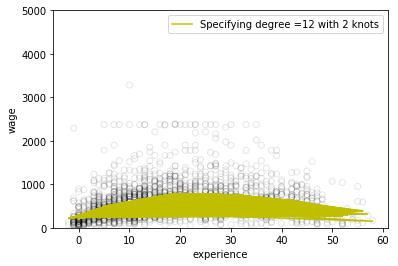

380.271931304038


In [212]:
## 4 ## 
# cubic spline with 2 knots at 20, 40
cubic_x4 = dmatrix("bs(train, knots = (20, 40), degree = 12, include_intercept = False)", {"train": exper_x[['exper']]}, return_type = 'dataframe')
model8 = sm.GLM(wage, cubic_x4).fit()

# find fitted value
fit4 = model8.predict(cubic_x4)

# plot spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(exper_x[['exper']], fit4, color='y', label='Specifying degree =12 with 2 knots')
plt.legend()
plt.ylim(0,5000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

# Calculating RMSE value
rms = sqrt(mean_squared_error(wage, fit4))
print(rms)

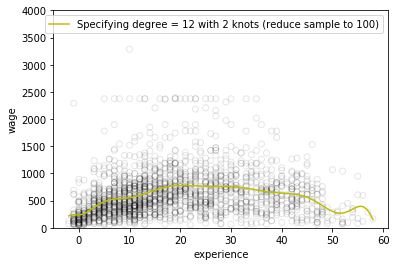

In [193]:
# reduce samples down to 100
# x_lim = np.linspace(exper_x[['exper']].min(), exper_x[['exper']].max(), 100)

# find fitted value using x_lim
fit4_reduce = model8.predict(dmatrix("bs(train, knots = (20, 40), degree = 12, include_intercept = False)", {"train": x_lim}, return_type = 'dataframe'))

# plot spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(x_lim, fit4_reduce, color='y', label='Specifying degree = 12 with 2 knots (reduce sample to 100)')
plt.legend()
plt.ylim(0,4000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()